In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-song-audio")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sachinzzzzz
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-song-audio


100%|██████████| 456M/456M [00:05<00:00, 89.9MB/s]


In [ ]:
od.download("https://www.kaggle.com/datasets/ejlok1/cremad")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sachinzzzzz
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ejlok1/cremad


100%|██████████| 451M/451M [00:03<00:00, 137MB/s]


In [ ]:
od.download("https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sachinzzzzz
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee


100%|██████████| 107M/107M [00:01<00:00, 94.1MB/s] 


In [ ]:
od.download("https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sachinzzzzz
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess


100%|██████████| 428M/428M [00:03<00:00, 144MB/s]


In [ ]:
ravdess = "/content/ravdess-emotional-song-audio/audio_song_actors_01-24/"
ravdess_1_24 = "/content/ravdess-emotional-song-audio/"
cremad = "/content/cremad/AudioWAV/"
surrey = "/content/surrey-audiovisual-expressed-emotion-savee/ALL/"
toronto = "/content/toronto-emotional-speech-set-tess/TESS Toronto emotional speech set data/"
print(f"{os.listdir(cremad)}")


['1028_TAI_NEU_XX.wav', '1076_IOM_NEU_XX.wav', '1025_ITH_DIS_XX.wav', '1007_TIE_NEU_XX.wav', '1004_IOM_NEU_XX.wav', '1085_IEO_HAP_LO.wav', '1086_ITH_HAP_XX.wav', '1033_IWL_ANG_XX.wav', '1066_ITS_SAD_XX.wav', '1057_WSI_FEA_XX.wav', '1037_IEO_ANG_HI.wav', '1006_MTI_NEU_XX.wav', '1087_TIE_NEU_XX.wav', '1047_DFA_NEU_XX.wav', '1086_IEO_SAD_HI.wav', '1006_IEO_ANG_MD.wav', '1007_WSI_DIS_XX.wav', '1011_IOM_NEU_XX.wav', '1069_ITS_SAD_XX.wav', '1039_TAI_SAD_XX.wav', '1016_TSI_DIS_XX.wav', '1041_IEO_ANG_MD.wav', '1068_ITH_DIS_XX.wav', '1031_ITS_SAD_XX.wav', '1066_ITH_ANG_XX.wav', '1065_ITH_DIS_XX.wav', '1079_MTI_HAP_XX.wav', '1076_ITS_HAP_XX.wav', '1055_MTI_DIS_XX.wav', '1037_IEO_ANG_MD.wav', '1025_TSI_HAP_XX.wav', '1014_ITS_SAD_XX.wav', '1043_IEO_SAD_HI.wav', '1046_TIE_NEU_XX.wav', '1010_IWL_ANG_XX.wav', '1091_MTI_FEA_XX.wav', '1082_MTI_DIS_XX.wav', '1084_IWL_SAD_XX.wav', '1053_IWL_ANG_XX.wav', '1047_TAI_NEU_XX.wav', '1074_IWL_NEU_XX.wav', '1001_TSI_NEU_XX.wav', '1090_IEO_SAD_LO.wav', '1055_IWL_

In [ ]:
ravdess_directory_list = os.listdir(ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,neutral,/content/ravdess-emotional-song-audio/audio_so...
1,happy,/content/ravdess-emotional-song-audio/audio_so...
2,angry,/content/ravdess-emotional-song-audio/audio_so...
3,sad,/content/ravdess-emotional-song-audio/audio_so...
4,calm,/content/ravdess-emotional-song-audio/audio_so...


In [ ]:
crema_directory_list = os.listdir(cremad)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(cremad + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

,Emotions,Path
0,neutral,/content/cremad/AudioWAV/1028_TAI_NEU_XX.wav
1,neutral,/content/cremad/AudioWAV/1076_IOM_NEU_XX.wav
2,disgust,/content/cremad/AudioWAV/1025_ITH_DIS_XX.wav
3,neutral,/content/cremad/AudioWAV/1007_TIE_NEU_XX.wav
4,neutral,/content/cremad/AudioWAV/1004_IOM_NEU_XX.wav


In [ ]:
toronto_directory_list = os.listdir(toronto)

file_emotion = []
file_path = []

for dir in toronto_directory_list:
    directories = os.listdir(toronto + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(toronto + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
toronto_df = pd.concat([emotion_df, path_df], axis=1)
toronto_df.head()

,Emotions,Path
0,neutral,/content/toronto-emotional-speech-set-tess/TES...
1,neutral,/content/toronto-emotional-speech-set-tess/TES...
2,neutral,/content/toronto-emotional-speech-set-tess/TES...
3,neutral,/content/toronto-emotional-speech-set-tess/TES...
4,neutral,/content/toronto-emotional-speech-set-tess/TES...


In [ ]:
surrey_directory_list = os.listdir(surrey)

file_emotion = []
file_path = []

for file in surrey_directory_list:
    file_path.append(surrey + file)
    part = file.split('_')[1]
    ele = part[:-6]
    if ele=='a':
        file_emotion.append('angry')
    elif ele=='d':
        file_emotion.append('disgust')
    elif ele=='f':
        file_emotion.append('fear')
    elif ele=='h':
        file_emotion.append('happy')
    elif ele=='n':
        file_emotion.append('neutral')
    elif ele=='sa':
        file_emotion.append('sad')
    else:
        file_emotion.append('surprise')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
surrey_df = pd.concat([emotion_df, path_df], axis=1)
surrey_df.head()

,Emotions,Path
0,happy,/content/surrey-audiovisual-expressed-emotion-...
1,neutral,/content/surrey-audiovisual-expressed-emotion-...
2,angry,/content/surrey-audiovisual-expressed-emotion-...
3,surprise,/content/surrey-audiovisual-expressed-emotion-...
4,fear,/content/surrey-audiovisual-expressed-emotion-...


In [ ]:
data_path = pd.concat([Crema_df, toronto_df, surrey_df, Ravdess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

,Emotions,Path
0,neutral,/content/cremad/AudioWAV/1028_TAI_NEU_XX.wav
1,neutral,/content/cremad/AudioWAV/1076_IOM_NEU_XX.wav
2,disgust,/content/cremad/AudioWAV/1025_ITH_DIS_XX.wav
3,neutral,/content/cremad/AudioWAV/1007_TIE_NEU_XX.wav
4,neutral,/content/cremad/AudioWAV/1004_IOM_NEU_XX.wav


In [ ]:
data_path.keys()

Index(['Emotions', 'Path'], dtype='object')

In [ ]:
data_path['Emotions'].value_counts()

,count
Emotions,
happy,1915
angry,1915
sad,1915
fear,1915
disgust,1731
neutral,1699
surprise,460
calm,184


<Axes: xlabel='Emotions', ylabel='count'>

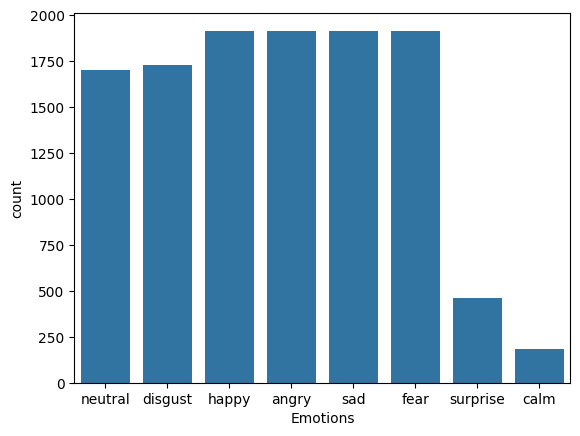

In [ ]:
sns.countplot(data=data_path, x='Emotions')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

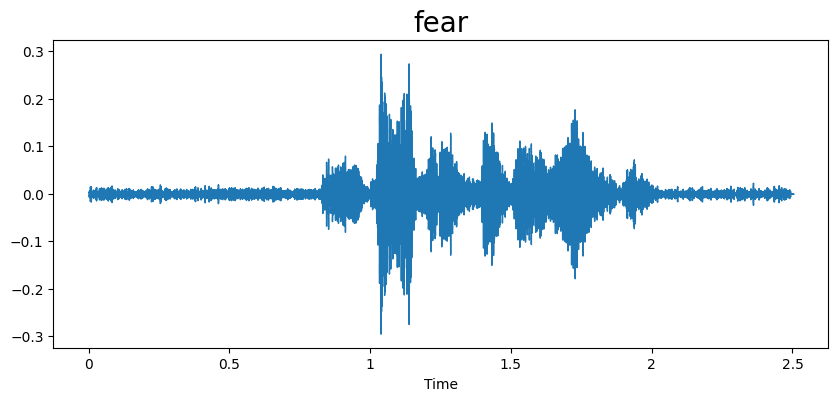

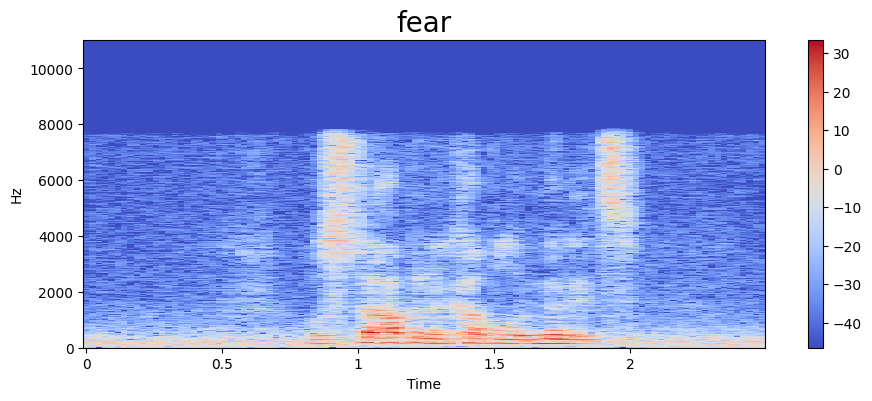

In [ ]:
emotion = 'fear'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

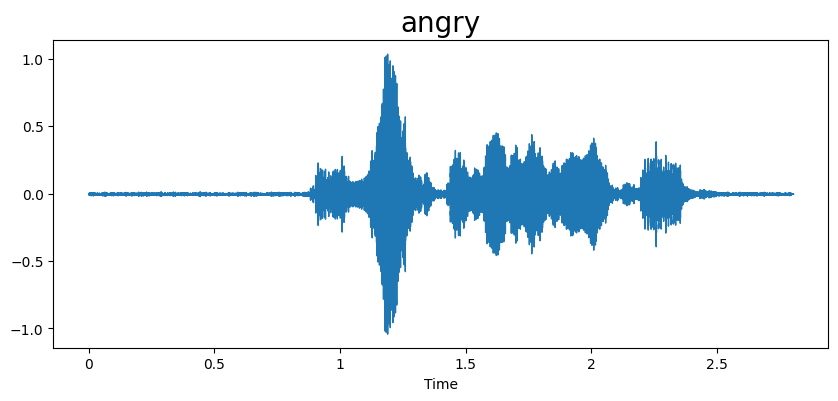

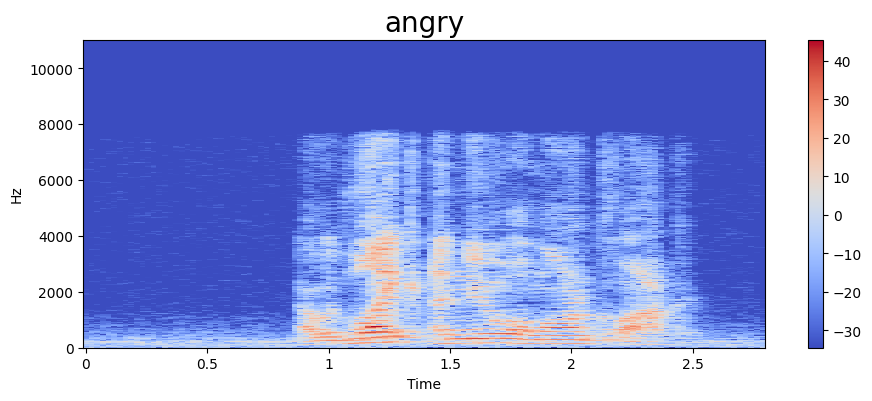

In [ ]:
emotion = 'angry'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
data_path[:20]

,Emotions,Path
0,neutral,/content/cremad/AudioWAV/1028_TAI_NEU_XX.wav
1,neutral,/content/cremad/AudioWAV/1076_IOM_NEU_XX.wav
2,disgust,/content/cremad/AudioWAV/1025_ITH_DIS_XX.wav
3,neutral,/content/cremad/AudioWAV/1007_TIE_NEU_XX.wav
4,neutral,/content/cremad/AudioWAV/1004_IOM_NEU_XX.wav
5,happy,/content/cremad/AudioWAV/1085_IEO_HAP_LO.wav
6,happy,/content/cremad/AudioWAV/1086_ITH_HAP_XX.wav
7,angry,/content/cremad/AudioWAV/1033_IWL_ANG_XX.wav
8,sad,/content/cremad/AudioWAV/1066_ITS_SAD_XX.wav
9,fear,/content/cremad/AudioWAV/1057_WSI_FEA_XX.wav


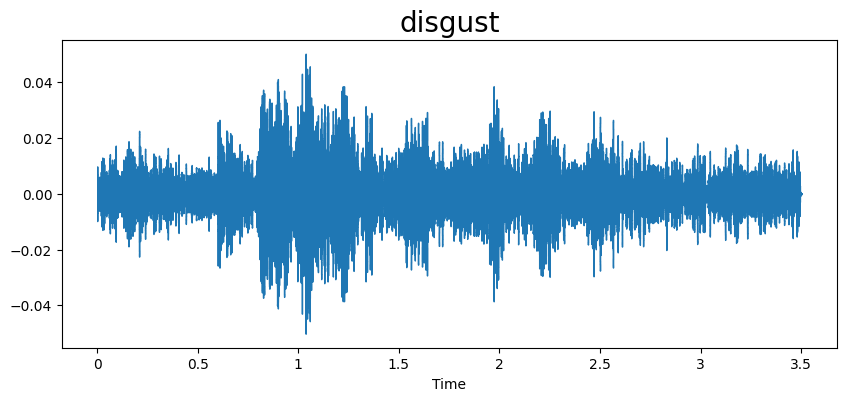

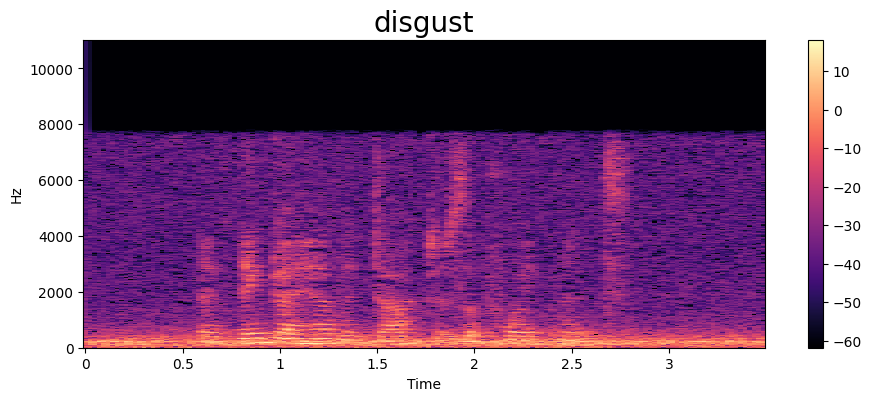

In [ ]:
emotion = 'disgust'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

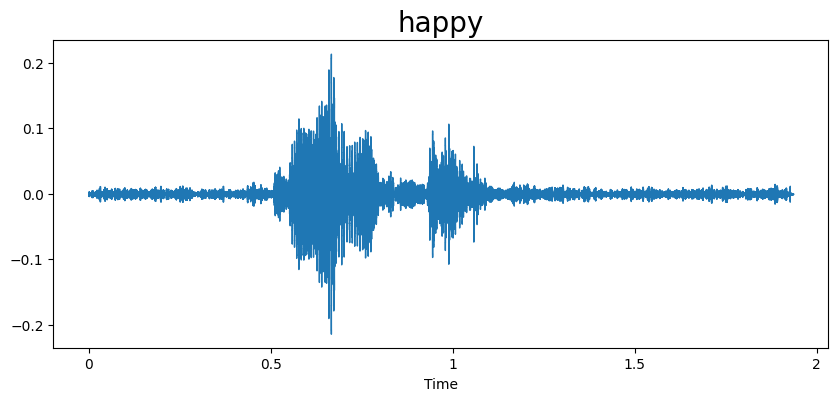

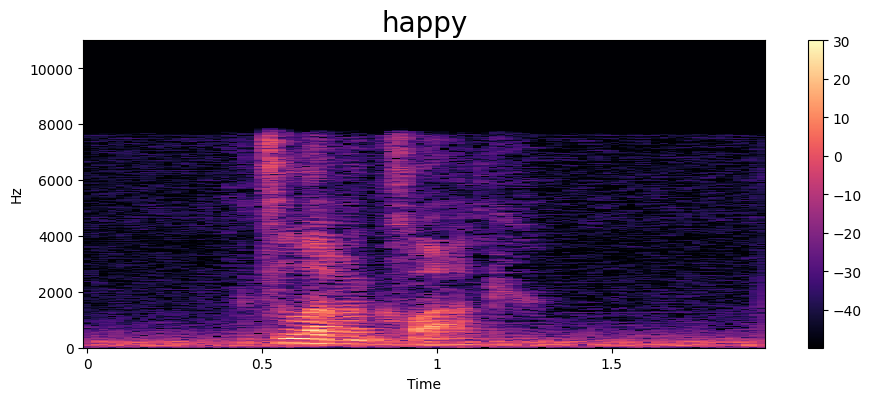

In [ ]:
emotion = 'happy'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

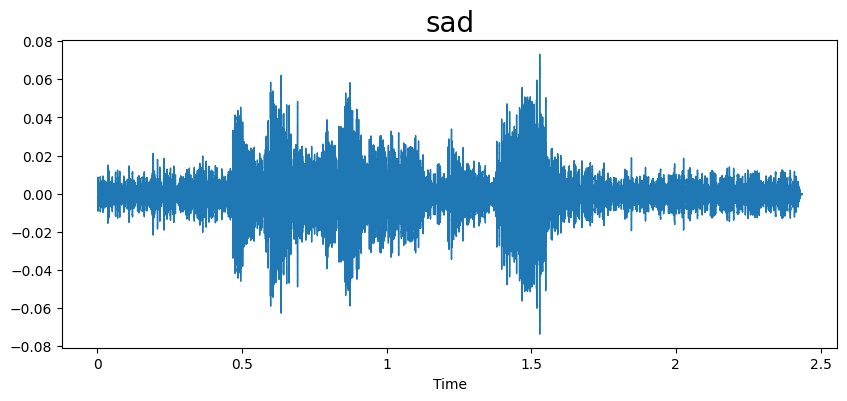

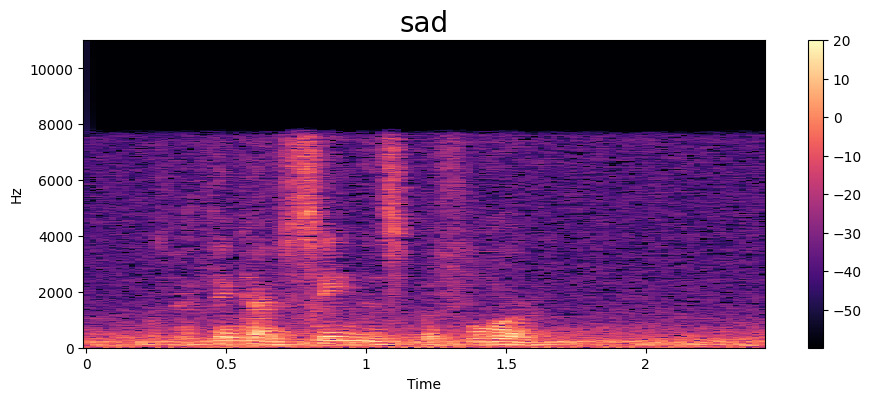

In [ ]:
emotion = 'sad'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

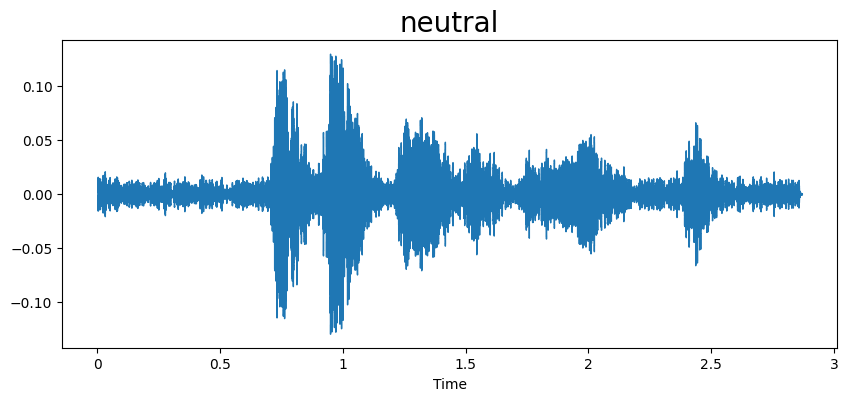

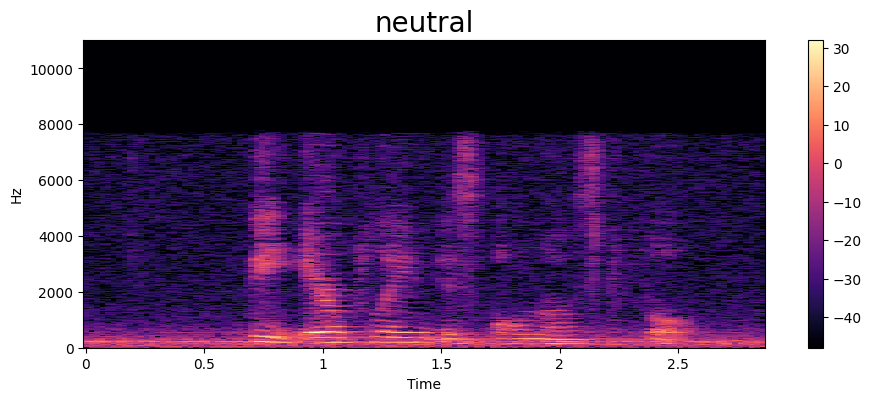

In [ ]:
emotion = 'neutral'
path = np.array(data_path['Path'][data_path['Emotions']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

In [ ]:
def extract_mfcc(filename):
  result = np.array([])
  mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
  result = np.hstack((result, mfcc)) # stacking horizontally
  return result

def extract_rmse(filename):
  result = np.array([])
  rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
  result = np.hstack((result, rms)) # stacking horizontally
  return result


In [ ]:
data

array([ 1.4897177e-04,  7.4772525e-04,  2.7090166e-04, ...,
       -3.4877203e-08,  3.0082134e-07, -2.9241934e-07], dtype=float32)

In [ ]:
sample_rate

22050

In [ ]:
res1 = extract_mfcc(data)
result = np.array(res1)
res2 = extract_rmse(data)
result



array([-4.14543701e+02,  1.35245056e+02,  7.36150816e-02,  6.47910919e+01,
       -1.21394968e+01,  2.23293095e+01, -1.02234154e+01,  7.88564062e+00,
       -1.29924526e+01,  1.44547796e+00,  2.67307848e-01, -2.80603051e+00,
        3.95814896e+00, -5.84347820e+00,  3.64464235e+00, -1.28634510e+01,
        2.48913360e+00, -7.91790771e+00,  1.91444075e+00, -2.74729776e+00])

In [ ]:
result.shape

(20,)

In [ ]:
x_mfcc = data_path['Path'].apply(lambda x : extract_mfcc(x))

In [ ]:
x_mfcc.shape

(11734,)

In [ ]:
x_rmse = data_path['Path'].apply(lambda x : extract_rmse(x))

In [ ]:
x_rmse.shape

(11734,)

In [ ]:
X = [x for x in x_mfcc]
X = np.array(X)
X = np.expand_dims(X,-1)
X.shape

(11734, 20, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(data_path[['Emotions']])

In [ ]:
y = y.toarray()
y.shape

(11734, 8)

**model training**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(8, activation='softmax')
])
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam',metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │             520 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,864 (1.17 MB)

 Trainable params: 305,864 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X,y,validation_split = 0.2, epochs = 100, batch_size = 512,shuffle = True)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 461ms/step - accuracy: 0.1725 - loss: 1.8916 - val_accuracy: 0.0256 - val_loss: 2.4162
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 392ms/step - accuracy: 0.1800 - loss: 1.8893 - val_accuracy: 0.1040 - val_loss: 2.4568
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 390ms/step - accuracy: 0.1825 - loss: 1.8893 - val_accuracy: 0.0256 - val_loss: 2.4459
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 480ms/step - accuracy: 0.1818 - loss: 1.8897 - val_accuracy: 0.1040 - val_loss: 2.4527
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 421ms/step - accuracy: 0.1801 - loss: 1.8896 - val_accuracy: 0.1040 - val_loss: 2.4580
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 394ms/step - accuracy: 0.1694 - loss: 1.8927 - val_accuracy: 0.1040 - val_loss: 2.4862
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 9s 486ms/step - accuracy: 0.1785 - loss: 1.8852 - val_accuracy: 0.0256 - val_loss: 2.4190
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 10s 474ms/step - accuracy: 0.1862 - loss: 1.8907 - val_a

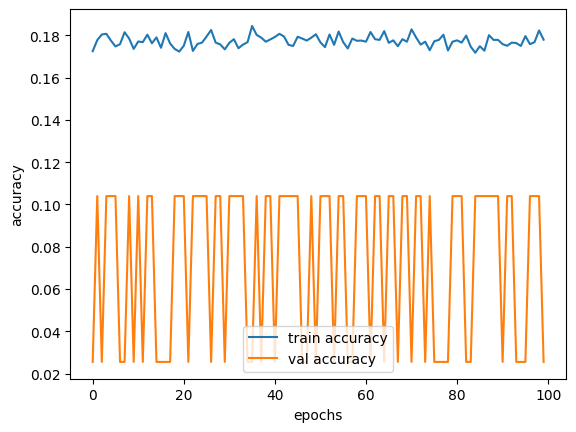

In [ ]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

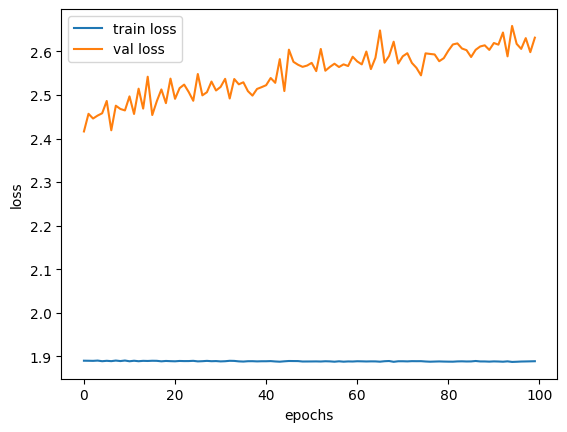

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
def extract_features(data):
    result = np.array([])
    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc)) # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms)) # stacking horizontally


    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data)
    result = np.array(res1)

    return result

X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

In [ ]:
len(X), len(Y), data_path.Path.shape

(246414, 246414, (11734,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()
Features

,0,labels
0,-402.164215,neutral
1,131.605515,neutral
2,22.818956,neutral
3,59.385548,neutral
4,-14.438452,neutral
...,...,...
246409,6.078300,calm
246410,17.862360,calm
246411,4.669335,calm
246412,19.841438,calm


In [ ]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [ ]:
print("Initial shape of X:", X.shape)
print("Initial shape of Y:", Y.shape)  # Should be (246414,)


Initial shape of X: (246414, 1)
Initial shape of Y: (246414,)


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Reshape if `Y` is 1D, then one-hot encode
Y = np.array(Y).reshape(-1, 1)  # Ensure Y is of shape (246414, 1)
encoder = OneHotEncoder()
Y = encoder.fit_transform(Y)


In [ ]:
from sklearn.model_selection import train_test_split

# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((184810, 1), (184810, 8), (61604, 1), (61604, 8))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((184810, 1), (184810, 8), (61604, 1), (61604, 8))

In [ ]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((184810, 1, 1), (184810, 8), (61604, 1, 1), (61604, 8))

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=50,           # Set the number of epochs
    batch_size=64,        # Set the batch size
    shuffle=True
)


Epoch 1/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.1680 - loss: 1.9373 - val_accuracy: 0.1785 - val_loss: 1.9282
Epoch 2/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.1785 - loss: 1.9316 - val_accuracy: 0.1845 - val_loss: 1.9256
Epoch 3/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 39s 10ms/step - accuracy: 0.1802 - loss: 1.9268 - val_accuracy: 0.1825 - val_loss: 1.9225
Epoch 4/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 40s 9ms/step - accuracy: 0.1810 - loss: 1.9264 - val_accuracy: 0.1873 - val_loss: 1.9212
Epoch 5/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 29s 10ms/step - accuracy: 0.1819 - loss: 1.9236 - val_accuracy: 0.1859 - val_loss: 1.9203
Epoch 6/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - accuracy: 0.1830 - loss: 1.9234 - val_accuracy: 0.1856 - val_loss: 1.9194
Epoch 7/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.1850 - loss: 1.9219 - val_accuracy: 0.1856 - val_loss: 1.9203
Epoch 8/50
2888/2888 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.1862 - 

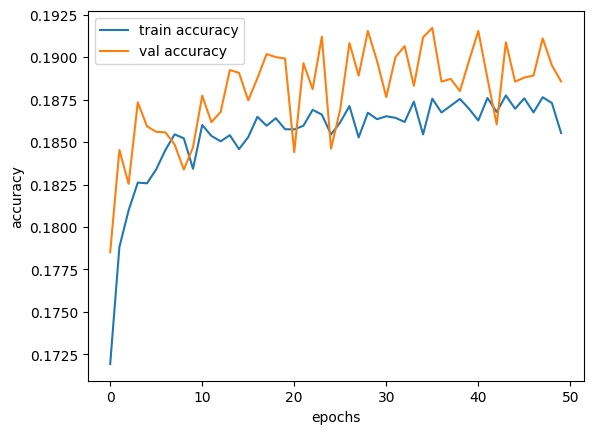

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

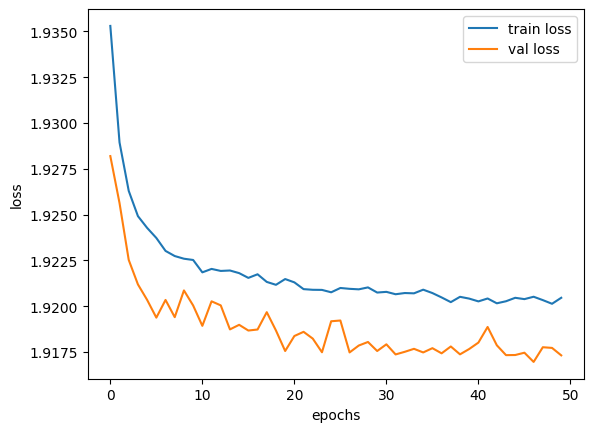

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()